# Project Title
---

Group Name

Team members:
- Abdullah Mohamed
- Abdulrahman Mohammed

## Introduction 
__Introduction to the topic__ 

    ...

---

## Problem Statement

The Olympic Games bring athletes from all over the world, but only a few end up winning medals. In this project we focused on how age, height, and weight set medalists apart from those who don’t.

## Objectives:
__Questions that will guide the analysis to solve the problem__

    ...

---

## Exploratory Data Analysis (EDA):

### Data Info:
__Getting the data and exploring it (includes descriptive statistics)__

In [6]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
# Create a DataFrame
olympics_df = pd.read_csv('cleaned.csv')

In [8]:
#Shape
olympics_df.shape

(271116, 13)

In [9]:
#Data info
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   271116 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [10]:
#Data statistics
olympics_df.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal
count,"271,116.00",271116,271116,"261,642.00","210,945.00","208,241.00",271116,271116,271116,271116,271116,271116,271116
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,42,66,765,4
top,NaN,Robert Tait McKenzie,Male,NaN,NaN,NaN,United States,USA,2000 Summer,London,Athletics,Football Men's Football,No Medals
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,22426,38624,5733,231333
mean,"68,248.95",NaN,NaN,25.56,175.34,70.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"39,022.29",NaN,NaN,6.39,10.52,14.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00,NaN,NaN,10.00,127.00,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,"34,643.00",NaN,NaN,21.00,168.00,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"68,205.00",NaN,NaN,24.00,175.00,70.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"102,097.25",NaN,NaN,28.00,183.00,79.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Missing Values Count in percentage
olympics_df.isnull().mean() * 100

ID        0.00
Name      0.00
Sex       0.00
Age       3.49
Height   22.19
Weight   23.19
Team      0.00
NOC       0.00
Games     0.00
City      0.00
Sport     0.00
Event     0.00
Medal     0.00
dtype: float64

In [12]:
#To check for the sex column distribution

olympics_df['Sex'].value_counts()

Sex
Male      196594
Female     74522
Name: count, dtype: int64

In [13]:
#To check for the Medal column distribution with the nulls

olympics_df['Medal'].value_counts(dropna=False)

Medal
No Medals    231333
Gold          13372
Bronze        13295
Silver        13116
Name: count, dtype: int64

In [14]:
#Top 5 NOC
olympics_df['NOC'].value_counts().head(5)

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: count, dtype: int64

In [15]:
# To Check for duplicates
olympics_df.duplicated(subset=['ID','Games']).sum()


83664

### Data Handling: 
__Cleaning, transforming, and combining data__

In [16]:
# Standardizing the sex varaints into two Male and Female

olympics_df['Sex'] = olympics_df['Sex'].replace(['M', 'male'], 'Male')
olympics_df['Sex'] = olympics_df['Sex'].replace(['F', 'FeMale'], 'Female')
olympics_df['Sex'].value_counts()

Sex
Male      196594
Female     74522
Name: count, dtype: int64

In [17]:
# Clean Height and Weight columns 
olympics_df['Height'] = olympics_df['Height'].astype(str).str.replace('cm','').str.strip()
olympics_df['Weight'] = olympics_df['Weight'].astype(str).str.replace('kg','').str.strip()


In [18]:
# Change The Height, Weight and Age types
olympics_df['Height'] = pd.to_numeric(olympics_df['Height'], errors='coerce')
olympics_df['Weight'] = pd.to_numeric(olympics_df['Weight'], errors='coerce')
olympics_df['Age'] = pd.to_numeric(olympics_df['Age'], errors='coerce')
olympics_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [19]:
#Seperate the olympics_df into two dataframes based on the sex. This is to get more accurate median to fill in the missing values

male_df = olympics_df[olympics_df['Sex'] == 'Male'].copy()
female_df = olympics_df[olympics_df['Sex'] == 'Female'].copy()
male_df.shape
female_df.shape

(74522, 13)

In [20]:
# Impute the missing age values with the median based on the sex and the country

# Age for Male
male_age_df = male_df.groupby('NOC')['Age'].transform('median')
male_df['Age'].fillna(male_age_df, inplace=True)


# Age for Female
female_age_df = female_df.groupby('NOC')['Age'].transform('median')
female_df['Age'].fillna(female_age_df, inplace=True)





In [21]:
# Impute the missing Height values with the median based on the sex and the country

# Height for Male
male_height_df = male_df.groupby('NOC')['Height'].transform('median')
male_df['Height'].fillna(male_height_df, inplace=True)


# For Female
female_height_df = female_df.groupby('NOC')['Height'].transform('median')
female_df['Height'].fillna(female_height_df, inplace=True)

In [22]:
# Impute the missing Weight values with the median based on the sex and the country

# Weight for Male
male_weight_df = male_df.groupby('NOC')['Weight'].transform('median')
male_df['Weight'].fillna(male_weight_df, inplace=True)


# For Female
female_weight_df = female_df.groupby('NOC')['Weight'].transform('median')
female_df['Weight'].fillna(female_weight_df, inplace=True)

In [23]:
# To check if there is nulls after imputing 
male_df[['Age', 'Height', 'Weight']].isnull().sum()
female_df[['Age', 'Height', 'Weight']].isnull().sum()

Age       0
Height    7
Weight    5
dtype: int64

In [24]:
# Drop the nulls rows (some of the countries dont have any value to get the median from)
male_df = male_df.dropna(subset=['Height', 'Weight'])
female_df = female_df.dropna(subset=['Height', 'Weight'])

In [25]:
male_df[['Age', 'Height', 'Weight']].isnull().sum()
female_df[['Age', 'Height', 'Weight']].isnull().sum()

Age       0
Height    0
Weight    0
dtype: int64

In [26]:
# Change to 'No Medals' when there in null in the Medal column 
olympics_df['Medal'] = olympics_df['Medal'].fillna('No Medals')


### Analysis: 
__Answering the objectives through data analysis__



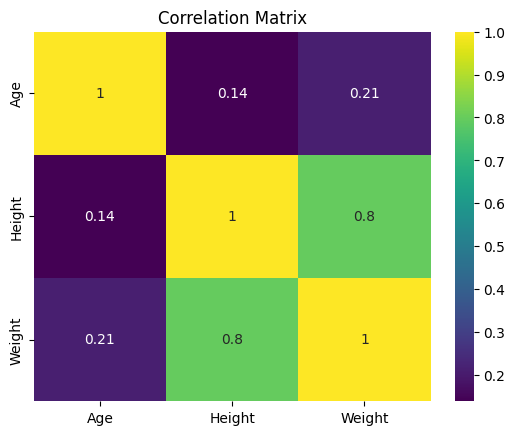

In [27]:
correlation = olympics_df[['Age','Height','Weight']].corr()
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()


#### Observations: 

- Correlations between Age, Height and Weight are weak (<0.2).

- This means no single factor guarantees a medal outcome.

## Athelete Attributes distributions by Sex

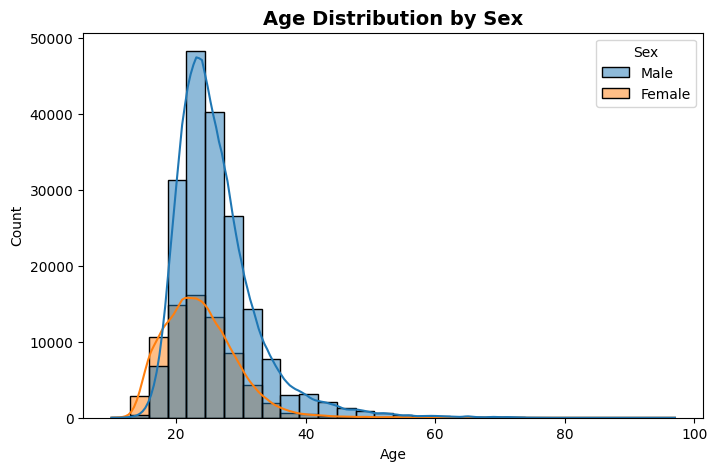

In [28]:
#Age distributions by Sex
plt.figure(figsize=(8,5))
sns.histplot(data=olympics_df, x='Age', hue='Sex', bins=30, kde=True)
plt.title("Age Distribution by Sex" , fontsize=14, fontweight="bold")
plt.show()

#### Observations:
- Male and female age distributions are very similar.

- Both peak in the mid-20s.

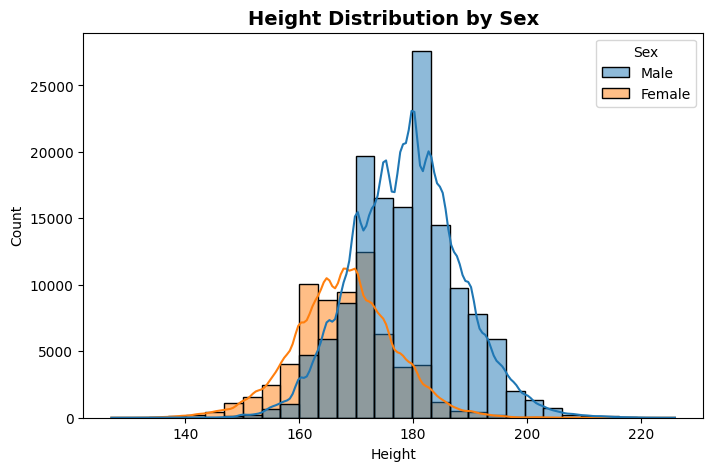

In [29]:
#Height distributions by Sex
plt.figure(figsize=(8,5))
sns.histplot(data=olympics_df, x='Height', hue='Sex', bins=30, kde=True)
plt.title("Height Distribution by Sex" , fontsize=14, fontweight="bold")
plt.show()

#### Observations:
- Males are generally taller than females.

- Female distribution is less spread.

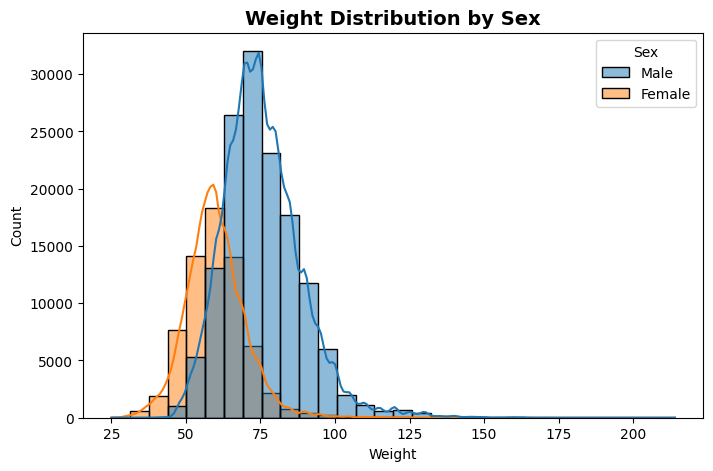

In [30]:
#Weight distributions by Sex
plt.figure(figsize=(8,5))
sns.histplot(data=olympics_df, x='Weight', hue='Sex', bins=30, kde=True)
plt.title("Weight Distribution by Sex" , fontsize=14, fontweight="bold")
plt.show()

#### Observations:

- Males are heavier on average.


## Athelete Attributes Distributions by Medal Types

In [31]:
tableau_colors = ["#4E79A7", "#F28E2B", "#76B7B2", "#E15759"]

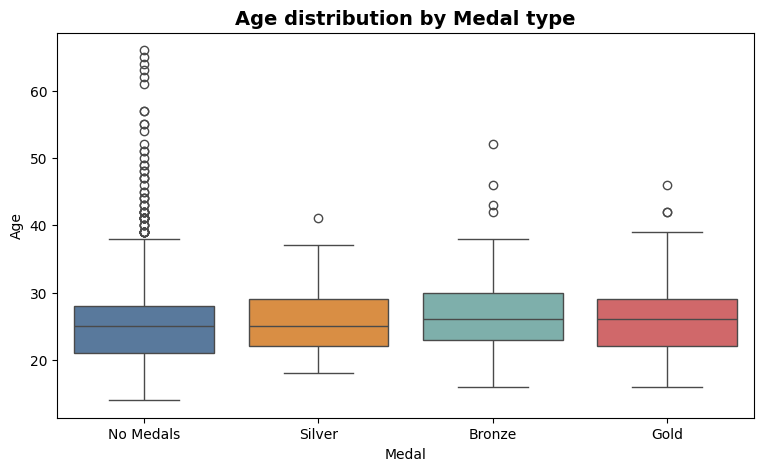

In [32]:
#Age distributions by Medal Types
plt.figure(figsize=(9,5))
sns.boxplot(data=olympics_df.sample(2000, random_state=1), x = 'Medal', y = 'Age', palette = tableau_colors)
plt.title('Age distribution by Medal type', fontsize=14, fontweight='bold')
plt.show()


#### Observations:
- Both Males and Females peak in the mid-20s.

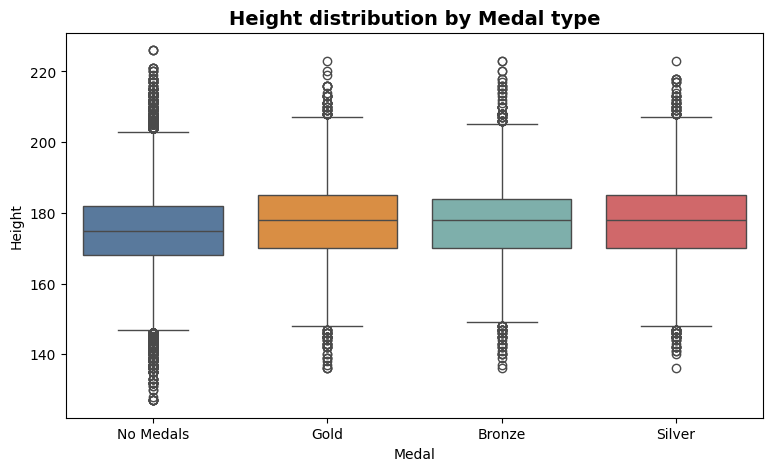

In [33]:
plt.figure(figsize=(9,5))
sns.boxplot(data=olympics_df, x='Medal', y='Height', palette=tableau_colors)
plt.title('Height distribution by Medal type', fontsize=14, fontweight='bold')
plt.show()


# Observations:
- Males are heavier on average.

- Female weights distribution is less spread.

- Both groups peak in the mid-20s.

- Medalists’ distribution is slightly tighter.

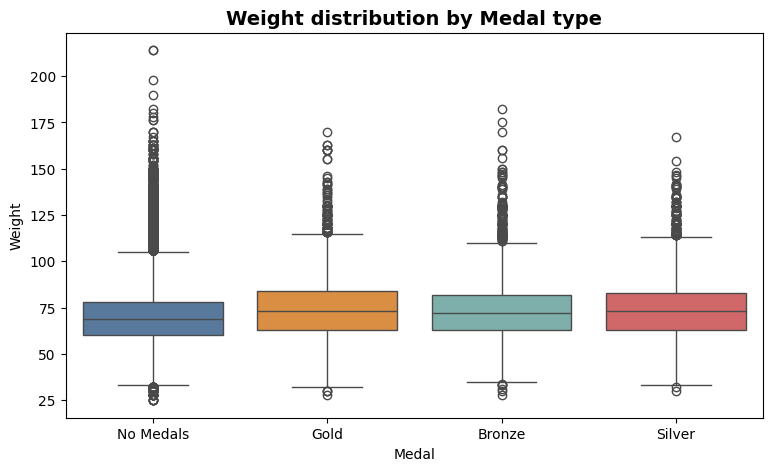

In [34]:
plt.figure(figsize=(9,5))
sns.boxplot(data=olympics_df, x='Medal', y='Weight', palette=tableau_colors)
plt.title('Weight distribution by Medal type', fontsize=14, fontweight='bold')
plt.show()


#### Observations:
- Males are heavier on average.

- Female weights distribution is less spread.

- Both groups peak in the mid-20s.

- Medalists’ distribution is slightly tighter.

In [37]:
# Create boolean columns for Summer and Winter
xs = olympics_df['Games'].str.contains('Summer', case=False)
js = olympics_df['Games'].str.contains('Winter', case=False)

In [41]:
# Create boolean columns
xs = olympics_df['Games'].str.contains('Summer', case=False)
js = olympics_df['Games'].str.contains('Winter', case=False)

# Filter rows where Summer is True
summer_df = olympics_df[xs == True]

# Filter rows where Winter is True
winter_df = olympics_df[js == True]

In [43]:
winter_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,Female,21.00,185.00,82.00,Netherlands,NED,1988 Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medals
5,5,Christine Jacoba Aaftink,Female,21.00,185.00,82.00,Netherlands,NED,1988 Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medals
6,5,Christine Jacoba Aaftink,Female,25.00,185.00,82.00,Netherlands,NED,1992 Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medals
7,5,Christine Jacoba Aaftink,Female,25.00,185.00,82.00,Netherlands,NED,1992 Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medals
8,5,Christine Jacoba Aaftink,Female,27.00,185.00,82.00,Netherlands,NED,1994 Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medals
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,Male,29.00,179.00,89.00,Poland-1,POL,1976 Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medals
271112,135570,Piotr ya,Male,27.00,176.00,59.00,Poland,POL,2014 Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medals
271113,135570,Piotr ya,Male,27.00,176.00,59.00,Poland,POL,2014 Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medals
271114,135571,Tomasz Ireneusz ya,Male,30.00,185.00,96.00,Poland,POL,1998 Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medals


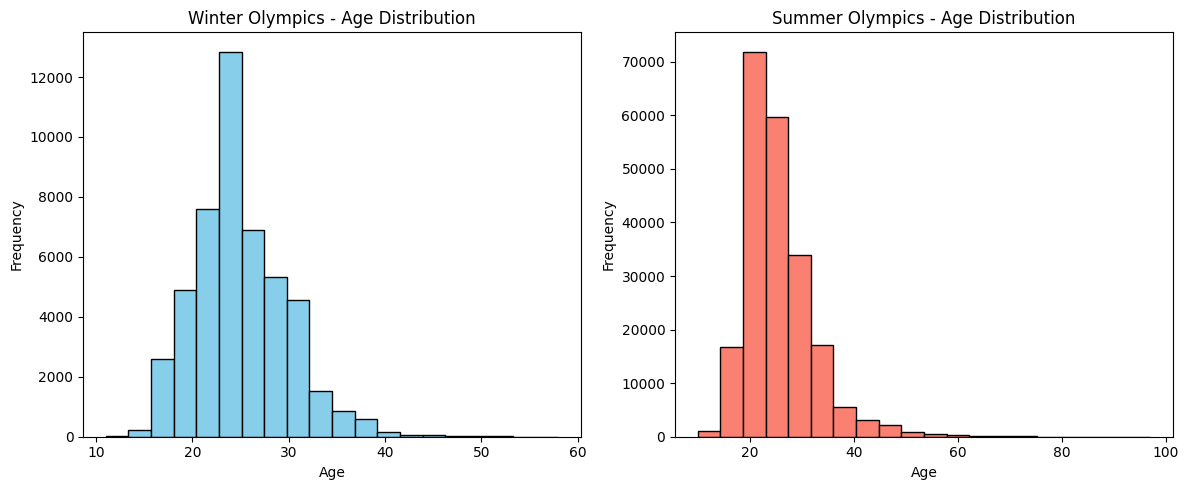

In [50]:
import matplotlib.pyplot as plt

# Set up the figure with two subplots
plt.figure(figsize=(12, 5))

# Histogram for Winter Olympics
plt.subplot(1, 2, 1)
plt.hist(winter_df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Winter Olympics - Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Summer Olympics
plt.subplot(1, 2, 2)
plt.hist(summer_df['Age'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Summer Olympics - Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

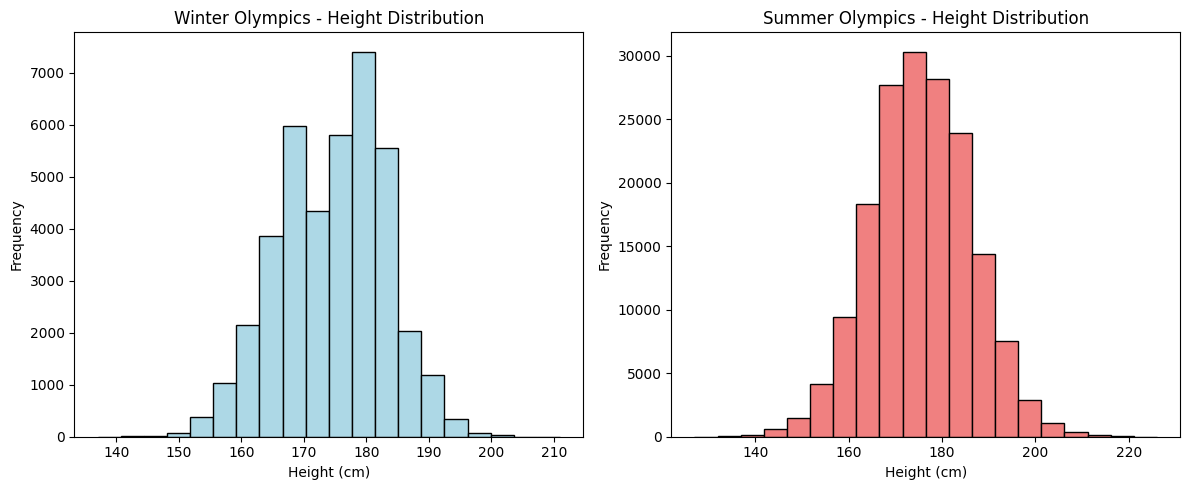

In [51]:
import matplotlib.pyplot as plt

# Set up the figure with two subplots
plt.figure(figsize=(12, 5))

# Winter Olympics - Height
plt.subplot(1, 2, 1)
plt.hist(winter_df['Height'].dropna(), bins=20, color='lightblue', edgecolor='black')
plt.title('Winter Olympics - Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

# Summer Olympics - Height
plt.subplot(1, 2, 2)
plt.hist(summer_df['Height'].dropna(), bins=20, color='lightcoral', edgecolor='black')
plt.title('Summer Olympics - Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

# Display both plots
plt.tight_layout()
plt.show()

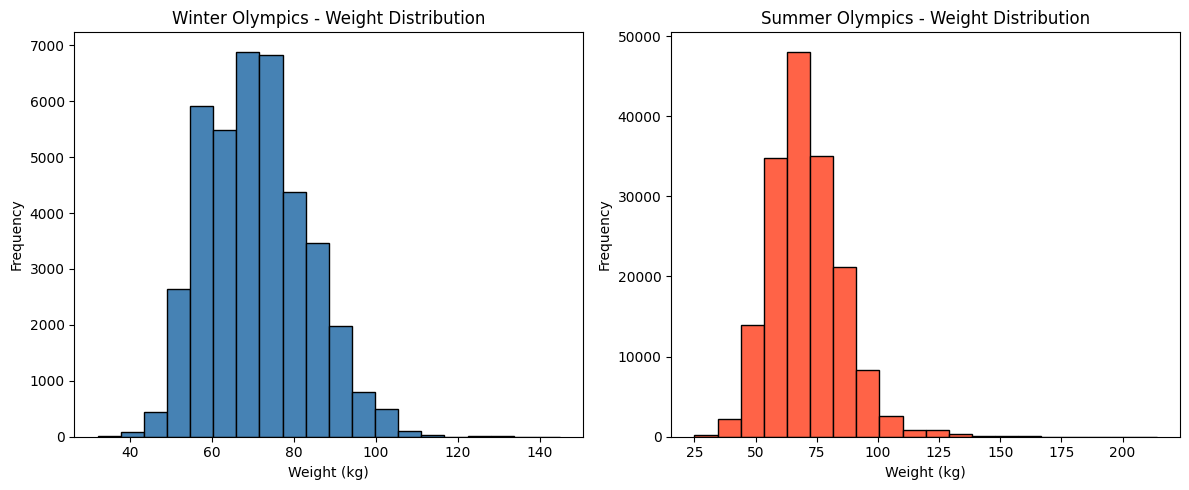

In [54]:
import matplotlib.pyplot as plt

# Set up the figure with two subplots
plt.figure(figsize=(12, 5))

# Winter Olympics - Weight
plt.subplot(1, 2, 1)
plt.hist(winter_df['Weight'].dropna(), bins=20, color='steelblue', edgecolor='black')
plt.title('Winter Olympics - Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Summer Olympics - Weight
plt.subplot(1, 2, 2)
plt.hist(summer_df['Weight'].dropna(), bins=20, color='tomato', edgecolor='black')
plt.title('Summer Olympics - Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Display both plots
plt.tight_layout()
plt.show()

In [42]:
summer_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal
0,1,A Dijiang,Male,24.00,180.00,80.00,China,CHN,1992 Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medals
1,2,A Lamusi,Male,23.00,170.00,60.00,China,CHN,2012 Summer,London,Judo,Judo Men's Extra-Lightweight,No Medals
2,3,Gunnar Nielsen Aaby,Male,24.00,NaN,NaN,Denmark,DEN,1920 Summer,Antwerpen,Football,Football Men's Football,No Medals
3,4,Edgar Lindenau Aabye,Male,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",Female,18.00,168.00,NaN,Netherlands,NED,1932 Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medals
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,Male,27.00,168.00,76.00,Argentina,ARG,2004 Summer,Athina,Hockey,Hockey Men's Hockey,No Medals
271107,135566,"James Francis ""Jim"" Zylker",Male,21.00,175.00,75.00,United States,USA,1972 Summer,Munich,Football,Football Men's Football,No Medals
271108,135567,Aleksandr Viktorovich Zyuzin,Male,24.00,183.00,72.00,Russia,RUS,2000 Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,No Medals
271109,135567,Aleksandr Viktorovich Zyuzin,Male,28.00,183.00,72.00,Russia,RUS,2004 Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,No Medals


In [55]:
summer_df['Event'].value_counts()

Event
Football Men's Football                                5733
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
Cycling Men's Road Race, Individual                    2947
                                                       ... 
Archery Men's Championnat Du Monde                        2
Archery Men's Target Archery, 50 metres, Individual       2
Archery Men's Target Archery, 33 metres, Individual       2
Archery Men's Target Archery, 28 metres, Individual       2
Aeronautics Mixed Aeronautics                             1
Name: count, Length: 651, dtype: int64

---

In [56]:
winter_df['Event'].value_counts()

Event
Ice Hockey Men's Ice Hockey            4702
Bobsleigh Men's Four                   1715
Alpine Skiing Men's Slalom             1593
Alpine Skiing Men's Giant Slalom       1535
Alpine Skiing Men's Downhill           1164
                                       ... 
Freestyle Skiing Women's Halfpipe        23
Snowboarding Women's Slopestyle          23
Speed Skating Men's Allround             23
Freestyle Skiing Women's Slopestyle      22
Alpinism Mixed Alpinism                  21
Name: count, Length: 119, dtype: int64

In [58]:
winter_df['Sex'].value_counts()

Sex
Male      33485
Female    15079
Name: count, dtype: int64

In [59]:
summer_df['Sex'].value_counts()

Sex
Male      163109
Female     59443
Name: count, dtype: int64

## Summary
__Summarizing the key insights from the analysis__

**Note**: _Use Bullet Points_

    ...

## Recommendations/Conclusion
**Note**: _Use Bullet Points_

    ...